Bagging: First of all you are gonna need to download "simulator.py" from the folder "src" to run this code. 

d:\Niko\Archivos de programa\Python 3.9.12\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\Niko\Archivos de programa\Python 3.9.12\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\Niko\Archivos de programa\Python 3.9.12\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\Niko\Archivos de programa\Python 3.9.12\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\Niko\Archivos de programa\Python 3.9.12\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in ve

Percentages MSE: 5.81
MSE: 357288.49
Sharpe: 0.84


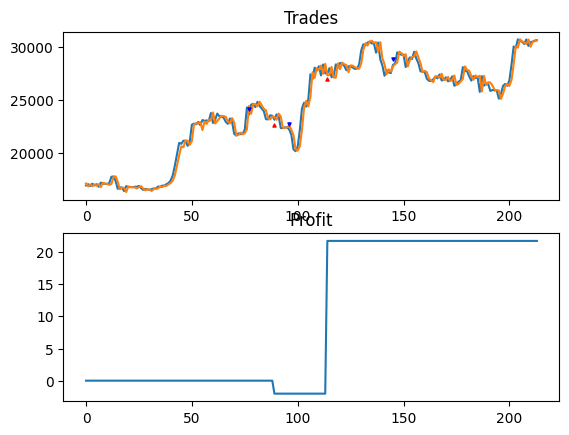

In [18]:
import numpy as np
import pandas as pd

from simulator import simulate
from sklearn import metrics
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

np.random.seed(2059033)

lr = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=1))

data = pd.read_csv('BTC-USD.csv')

data = data.dropna() #Delete columns and rows with missing values
data.Date = pd.to_datetime(data.Date) #Convert Date column to datetime
data.set_index('Date', drop=True, inplace=True) #Set Date column as index
diffs = (data.Close.diff()/data.Close).values[1:] #Calculate differences between consecutive values

diff_len = len(diffs) #Length of differences array



def create_x_data(lags=1):
    diff_data = np.zeros((diff_len, lags))

    for lag in range(1, lags+1):
        this_data = diffs[:-lag]
        diff_data[lag:, lag-1] = this_data

    return  diff_data

x_data = create_x_data(lags=20)*100
y_data = diffs*100

# REPRODUCIBILITY
x_data = np.around(x_data, decimals=8)
y_data = np.around(y_data, decimals=8)

# =============================================================================
# WALK FORWARD
# =============================================================================

window = 150
preds = np.zeros(diff_len-window)
for i in range(diff_len-window-1):
    x_train = x_data[i:i+window, :]
    y_train = y_data[i:i+window]
    lr.fit(x_train, y_train)
    preds[i] = lr.predict(x_data[i+window+1, :].reshape(1, -1))


print('Percentages MSE: %.2f'%metrics.mean_squared_error(y_data[window:], preds))
simulate(data, preds)


